In [23]:
import numpy as np
from math import *
import tensorflow as tf

from mp1 import *
from utils import *

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Conv2D, Conv2DTranspose, UpSampling2D, merge
from keras.optimizers import SGD, Adam
from keras.engine import Input

# 1. Simple Classification

## 1.1 Create datasets

In [3]:
# Train data
[X_train, Y_train] = generate_dataset_classification(300,20)
Y_train = keras.utils.np_utils.to_categorical(Y_train)

# Test data 
[X_test, Y_test] = generate_dataset_classification(100,20)
Y_test = keras.utils.np_utils.to_categorical(Y_test)

n = int(sqrt(X_train.shape[1]))

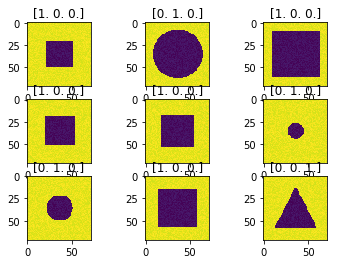

In [3]:
# Visualize shapes
plt.figure()
for i in range(9):
    j = np.random.randint(X_train.shape[0])
    plt.subplot(3, 3, i+1)
    plt.title("{}".format(Y_train[j]))
    plt.imshow(X_train[j].reshape(n, n))

## 1.2 Linear Classifier

In [4]:
model = Sequential()

model.add(Dense(3, input_shape=(n*n,), activation = "softmax"))

# Optimizer
## SGD
sgd = SGD(lr = 0.001, momentum= 0.9, decay=1e-6)
## Adam
adam = Adam(lr = 1e-3)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ["acc"])

# Summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=20, validation_split=0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/20
210/210 [==============================] - 0s 1ms/step - loss: 1.7983 - acc: 0.4143 - val_loss: 0.6594 - val_acc: 0.7333
Epoch 2/20
210/210 [==============================] - 0s 165us/step - loss: 0.8159 - acc: 0.7000 - val_loss: 0.6721 - val_acc: 0.8222
Epoch 3/20
210/210 [==============================] - 0s 244us/step - loss: 0.5181 - acc: 0.7619 - val_loss: 0.3748 - val_acc: 0.8000
Epoch 4/20
210/210 [==============================] - 0s 276us/step - loss: 0.3605 - acc: 0.9190 - val_loss: 0.3087 - val_acc: 0.9111
Epoch 5/20
210/210 [==============================] - 0s 235us/step - loss: 0.2865 - acc: 0.9333 - val_loss: 0.2593 - val_acc: 0.9333
Epoch 6/20
210/210 [==============================] - 0s 232us/step - loss: 0.3266 - acc: 0.8381 - val_loss: 0.2316 - val_acc: 0.9111
Epoch 7/20
210/210 [==============================] - 0s 226us/step - loss: 0.2199 - acc: 0.9190 - val_loss: 0.1940 - val_acc: 0.9556
Epoch 8/20
210/210 

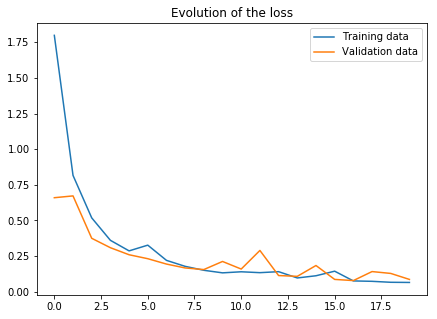

In [6]:
plot_history(history)

In [7]:
print("Accuracy on the test set: {}%".format(100*model.evaluate(X_test, Y_test)[1]))

100/100 [==============================] - 0s 90us/step
Accuracy on the test set: 100.0%


We easily get a good accuracy on this simple classification task.

## 1.3 Visualization of the weights

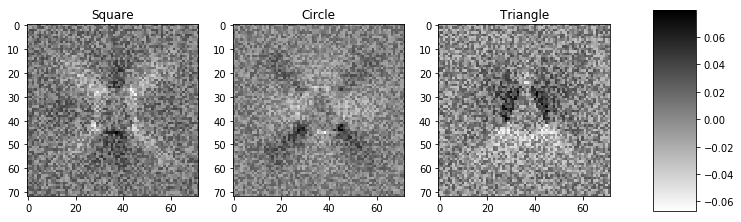

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
titles = ["Square", "Circle", "Triangle"]
for i in range(3):
    axes[i].set_title(titles[i])
    im = axes[i].imshow(model.get_weights()[0][:,i].reshape(n, n), cmap='binary')    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
plt.colorbar(im, cax=cbar_ax)
plt.show()

Each activation maps highlights the important features of the corresponding shape with respect to the others shapes.
- For the square, the network seems to be looking for the four vertices,
- For the circle, the network looks for the lack of bottom vertices,
- For the triangle it looks for the unique upper vertice.

# 2. A More Difficult Classification Problem

The shapes are not centered anymore and can change dimensions. We will first see how our previous simple linear network performs for this problem, then we will use a convolutionnal network.

## 2.1 Create datasets

In [9]:
[X_train, Y_train] = generate_dataset_classification(300,20, free_location = True)
Y_train = keras.utils.np_utils.to_categorical(Y_train)

[X_test, Y_test] = generate_test_set_classification()

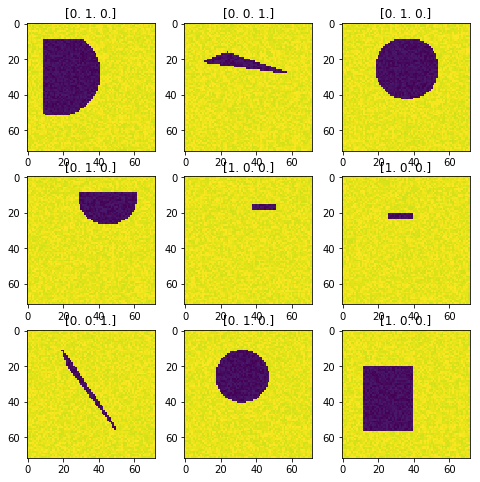

In [10]:
plt.figure(figsize = (8, 8))
for i in range(9):
    j = np.random.randint(X_train.shape[0])
    plt.subplot(3, 3, i+1)
    plt.title("{}".format(Y_train[j]))
    plt.imshow(X_train[j].reshape(n, n))

## 2.2 Linear Classifier

In [11]:
model = Sequential()

model.add(Dense(3, input_shape=(n*n,), activation = "softmax"))

# Optimizer
adam = Adam(lr = 1e-3)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ["acc"])

# Summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=20, validation_split=0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/20
210/210 [==============================] - 0s 1ms/step - loss: 2.5271 - acc: 0.3238 - val_loss: 1.4158 - val_acc: 0.3222
Epoch 2/20
210/210 [==============================] - 0s 171us/step - loss: 1.2046 - acc: 0.3810 - val_loss: 1.5066 - val_acc: 0.3556
Epoch 3/20
210/210 [==============================] - 0s 181us/step - loss: 1.2280 - acc: 0.3905 - val_loss: 1.3536 - val_acc: 0.4667
Epoch 4/20
210/210 [==============================] - 0s 171us/step - loss: 1.1432 - acc: 0.4714 - val_loss: 1.0937 - val_acc: 0.4444
Epoch 5/20
210/210 [==============================] - 0s 256us/step - loss: 0.9910 - acc: 0.5429 - val_loss: 1.2980 - val_acc: 0.3333
Epoch 6/20
210/210 [==============================] - 0s 162us/step - loss: 1.3397 - acc: 0.4333 - val_loss: 1.4933 - val_acc: 0.4444
Epoch 7/20
210/210 [==============================] - 0s 156us/step - loss: 1.0067 - acc: 0.5143 - val_loss: 1.0991 - val_acc: 0.5333
Epoch 8/20
210/210 

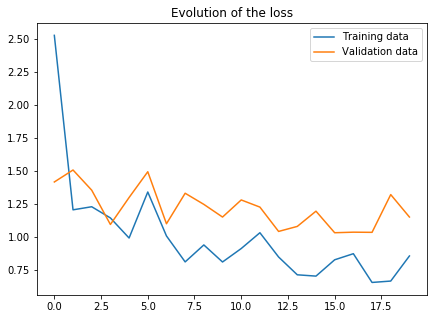

In [13]:
plot_history(history)

In [14]:
scores = model.evaluate(X_test, Y_test)
print("\nResults on test set")
print("Categorical cross-entropy : {}".format(round(scores[0], 2)))
print("Accuracy : {}%".format(round(100*scores[1], 2)))

300/300 [==============================] - 0s 55us/step

Results on test set
Categorical cross-entropy : 0.94
Accuracy : 56.0%


We see that our simple linear model is not able to address this more complex problem.

## 2.3 Non linear classifier

We now address this task with a shallow convolutional network composed of two successive combinaisons of convolutions and max-pooling. We also use include dropouts in order to limit the overfitting. 

In [9]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [16]:
[X_train, Y_train] = generate_dataset_classification(1000,20, free_location = True)
Y_train = keras.utils.np_utils.to_categorical(Y_train)

[X_test, Y_test] = generate_test_set_classification()

In [17]:
model = keras.models.Sequential()

model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (n, n, 1)))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (n, n, 1)))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(3, activation="softmax"))

# Optimizer
adam = Adam(lr = 1e-3)

# Compile model
model.compile(loss='MSE', optimizer=adam, metrics = ["acc"])

# Summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [18]:
history = model.fit(x=X_train.reshape(-1, n, n, 1), y=Y_train, batch_size=16, epochs=20, validation_split=0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 2s 3ms/step - loss: 0.2238 - acc: 0.3614 - val_loss: 0.2136 - val_acc: 0.5233
Epoch 2/20
700/700 [==============================] - 2s 2ms/step - loss: 0.2015 - acc: 0.5457 - val_loss: 0.1926 - val_acc: 0.6400
Epoch 3/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1713 - acc: 0.6243 - val_loss: 0.1678 - val_acc: 0.6533
Epoch 4/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1486 - acc: 0.6714 - val_loss: 0.1495 - val_acc: 0.7033
Epoch 5/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1330 - acc: 0.7114 - val_loss: 0.1394 - val_acc: 0.7167
Epoch 6/20
700/700 [==============================] - 2s 2ms/step - loss: 0.1156 - acc: 0.8071 - val_loss: 0.1289 - val_acc: 0.7133
Epoch 7/20
700/700 [==============================] - 2s 2ms/step - loss: 0.0996 - acc: 0.8214 - val_loss: 0.1129 - val_acc: 0.7867
Epoch 8/20
700/700 [==========

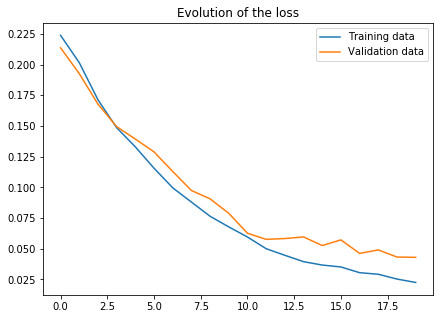

In [19]:
plot_history(history)

In [20]:
scores = model.evaluate(X_test.reshape(-1, n, n, 1), Y_test)
print("\nResults on test set")
print("Categorical cross-entropy : {}".format(round(scores[0], 2)))
print("Accuracy : {}%".format(round(100*scores[1], 2)))

300/300 [==============================] - 0s 749us/step

Results on test set
Categorical cross-entropy : 0.03
Accuracy : 95.0%


With this shallow convolutional model we achieve a $95.0\%$ accuracy on the test set.

# 3 A regression problem

We now address the task of detecting the three vertices of a triangle given an image of it. 

To do that we will use a convolutional network with four successive layers of {convolution + pooling}.

Since the order of the vertices do not matter, we need to somehow normalize the datasets so that each triangle has its vertices ordered using the same logic. We  will implement and test three different normalizations:
- Ordering the vertices by x-axis,
- Ordering the vertices by distance to the origin,
- Ordering the vertices by trigonometric order with respect to the barycenter of the triangle.


## 3.1 Generate dataset

In [21]:
[X_train, Y_train] = generate_dataset_regression(1000, 20)
X_train = X_train.reshape(-1, n, n, 1)
Y_train = Y_train.reshape(-1, 3, 2)
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(-1, n, n, 1)
Y_test = Y_test.reshape(-1, 3, 2)

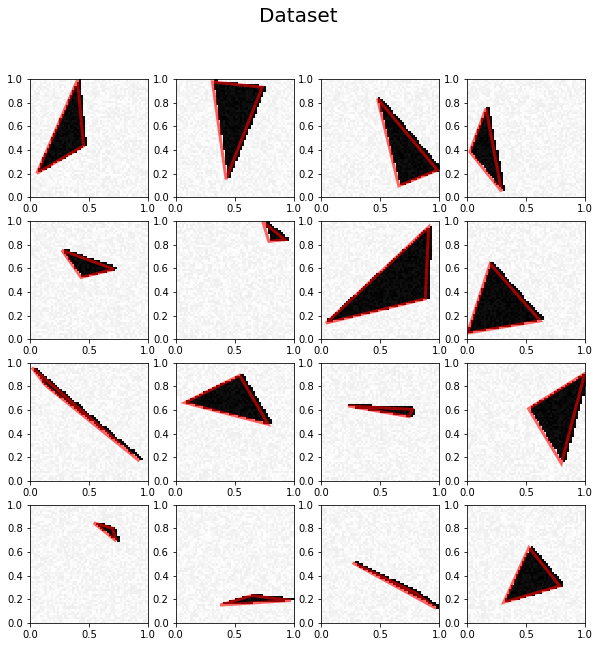

In [22]:
visualize_prediction_mult(X_train, Y_train, 20, ordered=True, show_order=False, size=(10, 10), title='Dataset')

## 3.2 Label normalizations

In [23]:
# By y-axis
Y_train_x_order = order_array(Y_train)
Y_test_x_order = order_array(Y_test)

# By distance to the origin
Y_train_norm = normalize_y_origin(Y_train)
Y_test_norm = normalize_y_origin(Y_test)

# By trigonometric order wrt the barycenter
Y_train_trigo = trigo_sort_barycenter(Y_train)
Y_test_trigo = trigo_sort_barycenter(Y_test)

## 3.3 Model architecture

In [24]:
def get_CNN():
    model = keras.models.Sequential()
    model.add(Conv2D(8, (3, 3), activation = 'relu', input_shape = (n, n, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(6, activation="sigmoid"))
    model.add(Reshape((3, 2)))

    # Optimizer
    adam = Adam(lr = 1e-3)

    # Compile model
    model.compile(loss="mse", optimizer=adam)
    
    return model

In [25]:
model = get_CNN()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          18496     
__________

## 3.4 Evaluation

### 3.4.1 Order vertices by x-axis

We first try to normalize the vertices by order on the x-axis. Example of orderings are shown in the following plot.

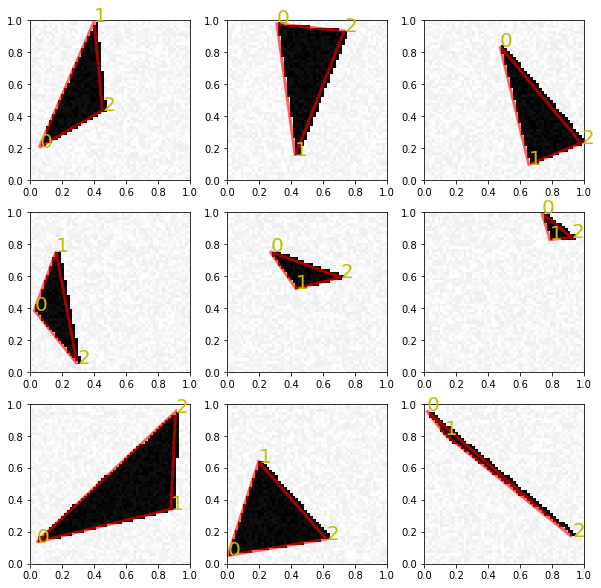

In [26]:
visualize_prediction_mult(X_train, Y_train_x_order, 9, ordered=True)

In [27]:
model = get_CNN()
history = model.fit(x=X_train, y=Y_train_x_order, batch_size=16, epochs=10, validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 4s 6ms/step - loss: 0.0594 - val_loss: 0.0469
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0335 - val_loss: 0.0314
Epoch 3/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0258 - val_loss: 0.0272
Epoch 4/10
700/700 [==============================] - 2s 4ms/step - loss: 0.0225 - val_loss: 0.0256
Epoch 5/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0203 - val_loss: 0.0246
Epoch 6/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0171 - val_loss: 0.0219
Epoch 7/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0153 - val_loss: 0.0215
Epoch 8/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0143 - val_loss: 0.0206
Epoch 9/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0136 - val_loss: 0.0234
Epoch 10/10
700/700 [==============================] -

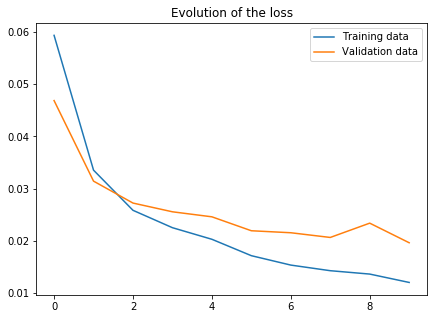

In [28]:
plot_history(history)

In [29]:
score = model.evaluate(x=X_test, y=Y_test_x_order, batch_size = 16)
print("Mean square error on test set: {}".format(round(score, 4)))

300/300 [==============================] - 0s 1ms/step
Mean square error on test set: 0.0165


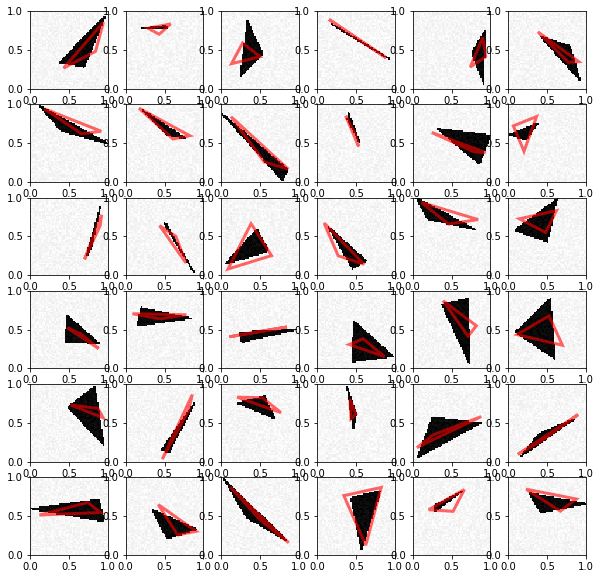

In [30]:
visualize_prediction_mult(X_test, model.predict(X_test), 40, show_order=False)

We get a mean square error of $1.65 * 10^{-2}$ on the test. However, visualy the predictions seem off.

To better understand the kinds of triangle that confuse the network, we can look at the ones with the highest errors :

In [31]:
Y_test_pred = model.predict(X_test).reshape(-1, 3, 2)
worst_i = get_worst(X_test, Y_test_x_order, Y_test_pred, 40)

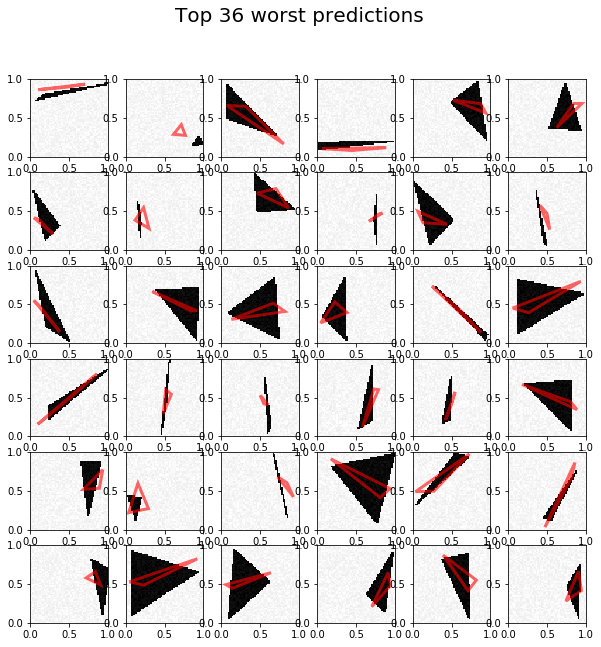

In [32]:
visualize_prediction_mult(X_test[worst_i], model.predict(X_test.reshape(-1, n, n, 1)[worst_i]), 36,
                          show_order=False, title="Top 36 worst predictions")

We can see that the network is confused for triangle were two vertices or more are close on the x-axis. In those cases, the network is not sure about how to order the vertices, and ends up predicting a sort of average of the two points.

We will now try a second normalization technique.

### 3.4.2 Order vertices by distance to the origin

We first try to normalize the vertices by their distance to the origin. Example of orderings are shown in the following plot.

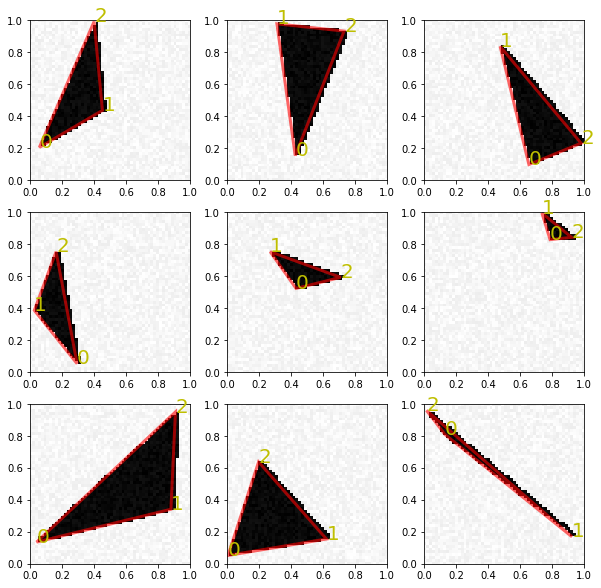

In [33]:
visualize_prediction_mult(X_train, Y_train_norm, 9, ordered=True)

In [34]:
model = get_CNN()
history = model.fit(x=X_train, y=Y_train_norm, batch_size=3, epochs=10, validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0417 - val_loss: 0.0295
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0249 - val_loss: 0.0254
Epoch 3/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0194 - val_loss: 0.0244
Epoch 4/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0162 - val_loss: 0.0172
Epoch 5/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0137 - val_loss: 0.0164
Epoch 6/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0118 - val_loss: 0.0150
Epoch 7/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0139
Epoch 8/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0141
Epoch 9/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0072 - val_loss: 0.0128
Epoch 10/10
700/700 [==============================] -

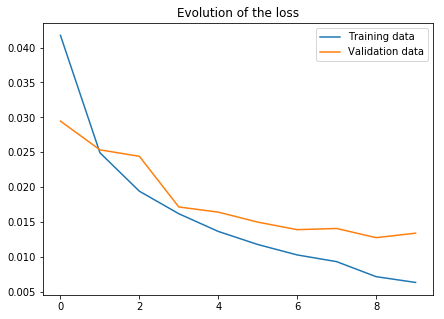

In [35]:
plot_history(history)

In [36]:
score = model.evaluate(x=X_test, y=Y_test_norm, batch_size = 16)
print("Mean square error on test set: {}".format(round(score, 4)))

300/300 [==============================] - 0s 856us/step
Mean square error on test set: 0.0188


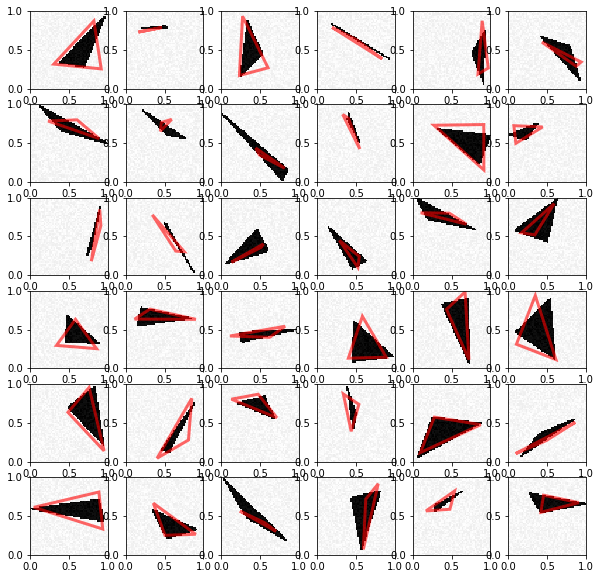

In [37]:
visualize_prediction_mult(X_test, model.predict(X_test), 40, show_order=False)

We get a mean square error of $1.88 * 10^{-2}$ on the test.

Let's look at the triangles yielding highest errors :

In [38]:
Y_test_pred = model.predict(X_test).reshape(-1, 3, 2)
worst_i = get_worst(X_test, Y_test_norm, Y_test_pred, 40)

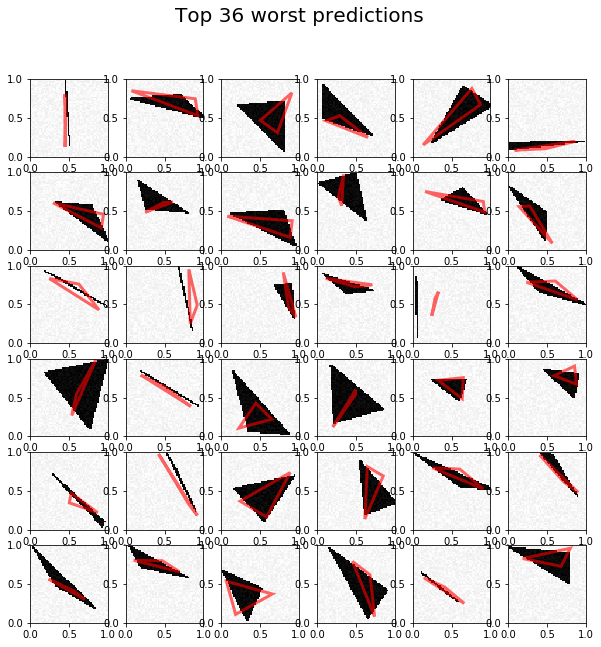

In [39]:
visualize_prediction_mult(X_test[worst_i], model.predict(X_test.reshape(-1, n, n, 1)[worst_i]), 36,
                          show_order=False, title="Top 36 worst predictions")

As we could expect, the triangle that seem the most problematic are now the ones containing vertices that are equidistant to the origin.

Finally we try a third normalization approach.

### 3.4.3 Order vertices by trigonometric order with respect to the barycenter

We finally order the vertices in trigonometric order with respect to the triangle's barycenter. Examples of orderings can be found below.

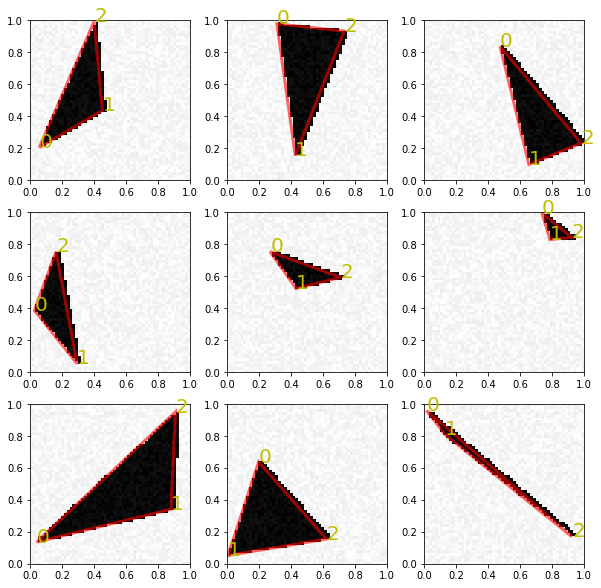

In [40]:
visualize_prediction_mult(X_train, Y_train_trigo, 9, ordered=True)

In [41]:
model = get_CNN()
history = model.fit(x=X_train, y=Y_train_trigo, batch_size=3, epochs=10, validation_split = 0.3)

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0397 - val_loss: 0.0291
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0213
Epoch 3/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0196 - val_loss: 0.0214
Epoch 4/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0172 - val_loss: 0.0195
Epoch 5/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0155 - val_loss: 0.0176
Epoch 6/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0138 - val_loss: 0.0166
Epoch 7/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0127 - val_loss: 0.0179
Epoch 8/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0120 - val_loss: 0.0170
Epoch 9/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0168
Epoch 10/10
700/700 [==============================] -

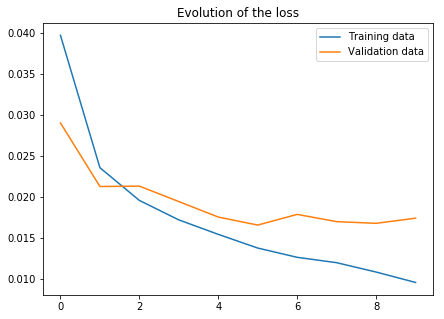

In [42]:
plot_history(history)

In [43]:
score = model.evaluate(x=X_test, y=Y_test_trigo, batch_size = 16)
print("Mean square error on test set: {}".format(round(score, 4)))

300/300 [==============================] - 0s 783us/step
Mean square error on test set: 0.0148


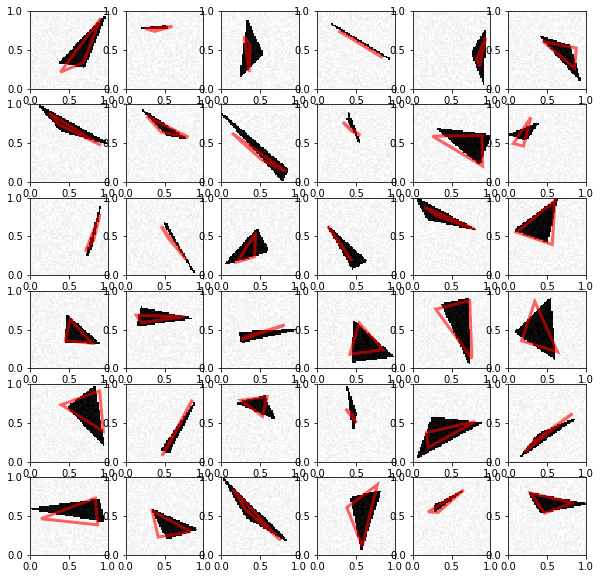

In [44]:
visualize_prediction_mult(X_test, model.predict(X_test), 40, show_order=False)

We get a mean square error of $1.48 * 10^{-2}$ on the test.

Let's look at the triangles yielding highest errors :

In [45]:
Y_test_pred = model.predict(X_test).reshape(-1, 3, 2)
worst_i = get_worst(X_test, Y_test_trigo, Y_test_pred, 40)
best_i = get_best(X_test, Y_test_trigo, Y_test_pred, 40)

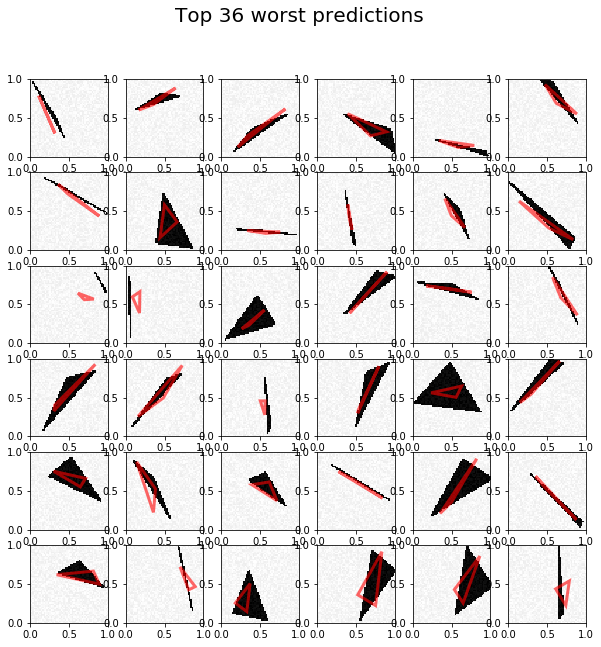

In [46]:
visualize_prediction_mult(X_test[worst_i], model.predict(X_test.reshape(-1, n, n, 1)[worst_i]), 36,
                          show_order=False, title="Top 36 worst predictions")

In this final case the problematic triangles are the ones where their upper vertice is has its median parallel to the y-axis.

# 4. Denoising with an hourglass network

We now implement a U-Net architecture to adress the problem of denoising images of simple shapes.

## 4.1 Creating dataset

In [4]:
# Train set
[X_train, Y_train] = generate_dataset_denoising(nb_samples = 300, free_location=True, max_noise=50)

# Test set
[X_test, Y_test] = generate_dataset_denoising(nb_samples = 300, free_location=True, max_noise=50)

In [5]:
X_train = X_train.reshape(-1, n, n, 1)
Y_train = Y_train.reshape(-1, n, n, 1)

X_test = X_test.reshape(-1, n, n, 1)
Y_test = Y_test.reshape(-1, n, n, 1)

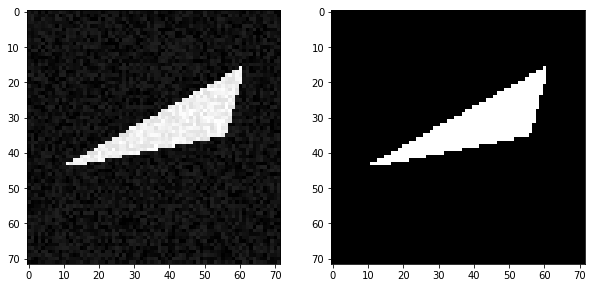

In [6]:
i = np.random.randint(X_train.shape[0])
plot_pair(X_train[i], Y_train[i])

## 4.2 U-Net architecture

In [15]:
inputs = Input(shape=(n, n, 1))

conv1a = Conv2D(32, (3, 3), activation = 'relu')(inputs) 
conv1b = Conv2D(32, (3, 3), activation = 'relu')(conv1a) 
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)

conv2a = Conv2D(64, (3, 3), activation = 'relu')(pool1)
conv2b = Conv2D(64, (3, 3), activation = 'relu')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)

conv3a = Conv2D(128, (3, 3), activation = 'relu')(pool2)
conv3b = Conv2D(128, (3, 3), activation = 'relu')(conv3a)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3b)

up3 = UpSampling2D(size = (2,2))(pool3)
up_conv3a = Conv2DTranspose(128, (2, 2), activation = 'relu')(up3)
merge3 = merge.Concatenate(axis=3)([conv3b, up_conv3a])
up_conv3b = Conv2DTranspose(128, (3, 3), activation = 'relu')(merge3) 
up_conv3c = Conv2DTranspose(128, (3, 3), activation = 'relu')(up_conv3b)

up2 = UpSampling2D(size = (2,2))(up_conv3c)
merge2 = merge.Concatenate(axis=3)([conv2b, up2])
up_conv2a = Conv2DTranspose(64, (3, 3), activation = 'relu')(merge2) 
up_conv2b = Conv2DTranspose(64, (3, 3), activation = 'relu')(up_conv2a)

up1 = UpSampling2D(size = (2,2))(up_conv2b)
merge1 = merge.Concatenate(axis=3)([conv1b, up1])
up_conv1a = Conv2DTranspose(32, (2, 2), activation = 'relu')(merge1)
up_conv1b = Conv2DTranspose(32, (2, 2), activation = 'relu')(up_conv1a)

up_conv10 = Conv2DTranspose(1, (3, 3), activation = 'sigmoid')(up_conv1b)

model = keras.models.Model(inputs = inputs, output = up_conv10)

# Optimizer
adam = Adam(lr = 1e-4)

# Compile model
model.compile(loss="mse", optimizer=adam)

# Summary of the model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 70, 70, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 68, 68, 32)   9248        conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 34, 34, 32)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

/Users/Antonin/DLenv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


## 4.3 Training and results

In [16]:
history = model.fit(x = X_train, y = Y_train, batch_size=8, epochs=10, validation_split = 0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/10
210/210 [==============================] - 16s 76ms/step - loss: 0.2078 - val_loss: 0.1396
Epoch 2/10
210/210 [==============================] - 16s 79ms/step - loss: 0.1238 - val_loss: 0.0981
Epoch 3/10
210/210 [==============================] - 16s 75ms/step - loss: 0.0703 - val_loss: 0.0353
Epoch 4/10
210/210 [==============================] - 14s 66ms/step - loss: 0.0233 - val_loss: 0.0135
Epoch 5/10
210/210 [==============================] - 15s 73ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 6/10
210/210 [==============================] - 15s 69ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 7/10
210/210 [==============================] - 14s 65ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 8/10
210/210 [==============================] - 14s 65ms/step - loss: 0.0069 - val_loss: 0.0057
Epoch 9/10
210/210 [==============================] - 18s 85ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 10/10
210/210 [================

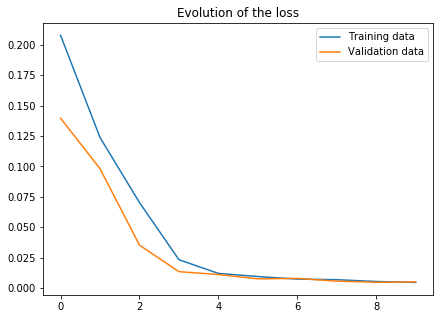

In [17]:
plot_history(history)

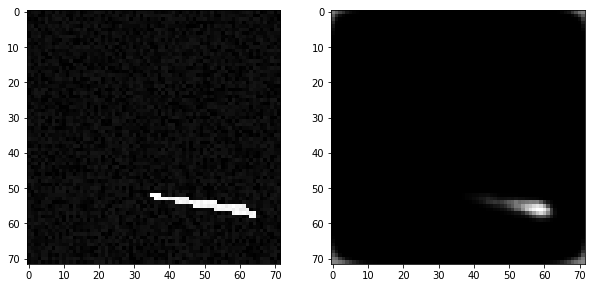

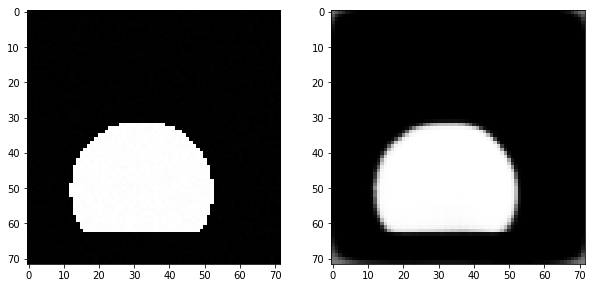

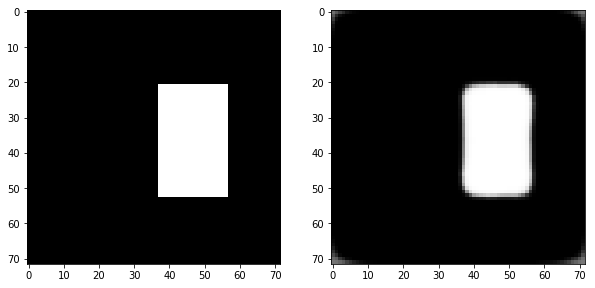

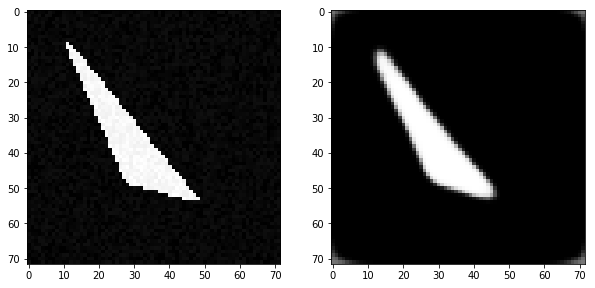

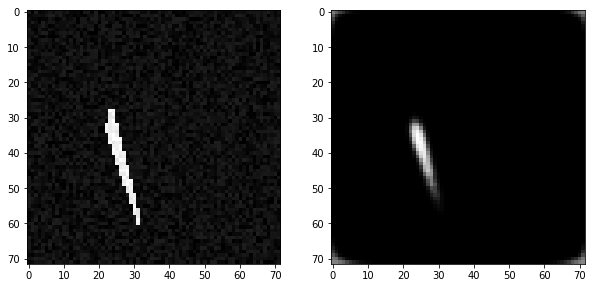

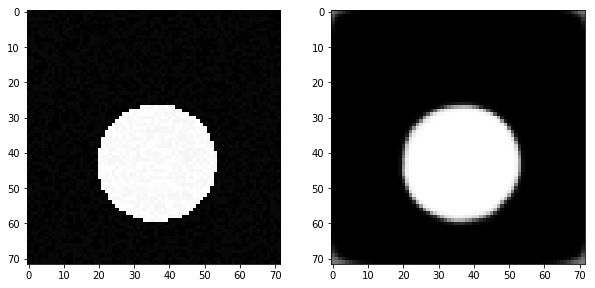

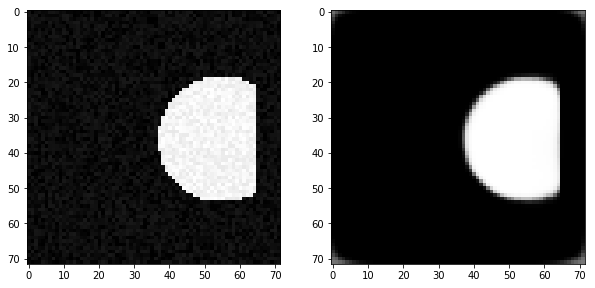

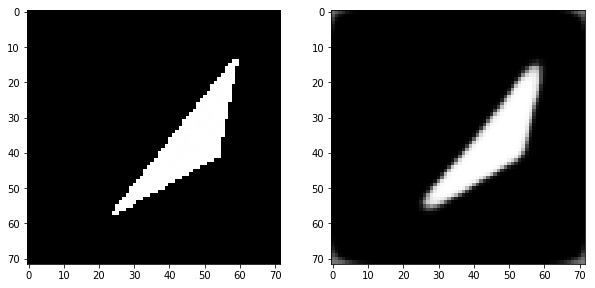

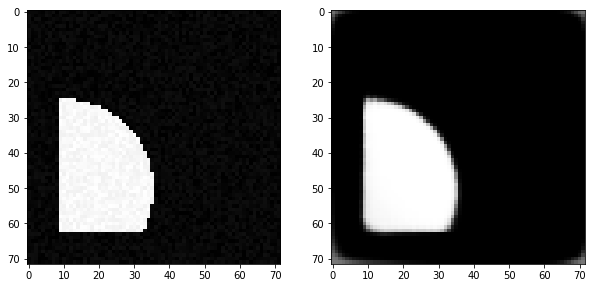

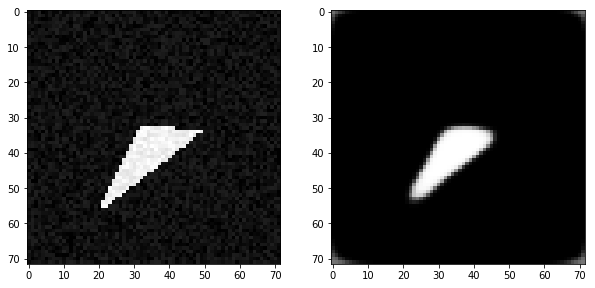

In [18]:
for i in range(10):
    plot_pair(X_train[i], model.predict(X_train[i].reshape(1, n, n, 1)))

In [22]:
print("Mean-square error on the test set: {}".format(model.evaluate(X_test, Y_test), 3))

300/300 [==============================] - 6s 22ms/step
Mean-square error on the test set: 0.005497452151030302


We achieve a mean square error of $5.5*10^{-3}$ on the test set.